# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [264]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, PrecisionRecallDisplay


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [265]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.

# Code below to display first 5 rows
print("First 5 rows are below!")
df.head()

First 5 rows are below!


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [266]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
y = df.TenYearCHD.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

print("X (train) dimensions are ", Xtrain.shape)
print("X (test) dimensions are ", Xtest.shape)
print("Y (train) dimensions are ", ytrain.shape)
print("Y (test) dimensions are ", ytest.shape)

X (train) dimensions are  (1828, 15)
X (test) dimensions are  (1828, 15)
Y (train) dimensions are  (1828,)
Y (test) dimensions are  (1828,)


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** Yes (L2 regularization). The "penalty" in LogisticRegression prevents infinite optimal solutions (overfitting).
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** Applying a penalty during learning results in smaller coefficients, since the model minimizes the complexity. With no penalty, coefficients are larger and this sometimes means the model will overfit the data.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** No, don't include a column of 1s. LogisticRegression already includes an intercept, so if you add a columns of 1s, your model will be giving incorrect predictions.

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

c:\Users\lukas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\lukas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


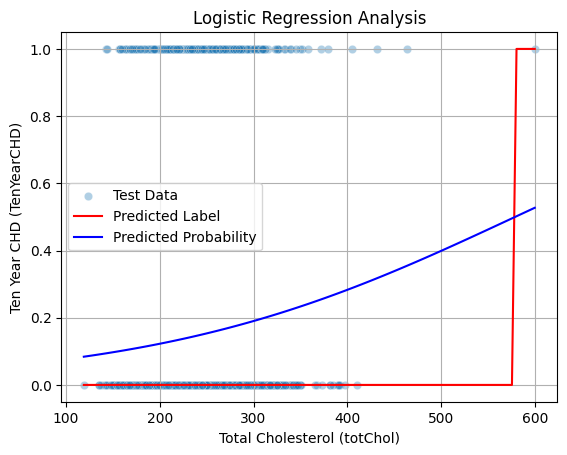

In [267]:
# Question 4 code here.
# Assign appropriate values to xscater, yscatter (x and y coordinates for scatter plot)
# xline (x coordinates for plot of prediction)
# yline_label (y coordinates for plot of predicted label)
# yline_prob (y coordinates for plot of predicted probability)

# YOUR CODE HERE

logReg = LogisticRegression(penalty=None, max_iter=10000)
logRegAnalysis = logReg.fit(Xtrain[['totChol']], ytrain)


xscatter = Xtest['totChol']
yscatter = ytest


xline = np.linspace(Xtest['totChol'].min(), Xtest['totChol'].max(), 100).reshape(-1, 1)

yline_label = logRegAnalysis.predict(xline)
yline_prob = logRegAnalysis.predict_proba(xline)[:,1]

# Plotting code provided
# xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.35, label = "Test Data") #Plot data
sns.lineplot(x=xline.flatten(),y=yline_label, label="Predicted Label", color='red') # Plot line indicating label
sns.lineplot(x=xline.flatten(),y=yline_prob, label="Predicted Probability", color='blue') # Plot line indicating probability

plt.xlabel('Total Cholesterol (totChol)')
plt.ylabel('Ten Year CHD (TenYearCHD)')
plt.title('Logistic Regression Analysis')
plt.grid()
plt.show()


## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** Only one. The test instance at totChol=600 and TenYearCHD=1.0 is labelled positive.

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** The classifier labelled it positive because the predicted probability is over 0.5 (which is above the specified threshold).

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

**YOUR ANSWER HERE:** No, this classifier is not useful for finding specific individuals who will develop CHD. It only labaled one test instance as positive throughout all of the data, which means that there may be a lot of false negatives in the totChol=350-450 range.

In [268]:
# Calculate performance measures from scratch - provided function
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of the ones I labeled -, how many are actually +?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
    
compute_performance(logRegAnalysis.predict(Xtest[['totChol']]), ytest, logRegAnalysis.classes_)

## Put code here to compute whatever else you might need to answer the question.




tp: 1 tn: 1538 fp: 0 fn: 289
Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**YOUR ANSWER HERE:** According to the more complex model, larger Age is more strongly associated with CHD if all other variables are held equal.

In [269]:
# Code for Question 6

X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD'].values

XtrainCMP, XtestCMP, ytrainCMP, ytestCMP = train_test_split(X, y, test_size=0.5, random_state=0)

complexLogReg = LogisticRegression(penalty=None, max_iter=10000)
complexLR = complexLogReg.fit(XtrainCMP,ytrainCMP)

features = X.columns
#print(features)
co = complexLogReg.coef_[0]
#print(co)

age_coefficient = co[1] #1 is the column where 'age' is
print(f"Age Coefficient: {age_coefficient}")

Age Coefficient: 0.06274537351796852


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 44 of the test instances are labeled positive by my classifier.

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

**YOUR ANSWER:** This is a (very slightly) better model for finding individuals likely to develop CHD. It has considerably better Recall, almost-identical accuracy, and has more true positives than the previous model.

In [270]:
# Code for Question 7

cmp = compute_performance(complexLR.predict(XtestCMP), ytestCMP, complexLR.classes_)


tp: 24 tn: 1518 fp: 20 fn: 266
Accuracy: 0.844 Recall: 0.083 Precision: 0.545 Sensitivity: 0.083 Specificity: 0.987


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** The all-variable classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance. I know this because I computed the AUROC for each classifier, and the value of the AUROC for the all-variable classifier was substaintially higher than the totChol-only classifier.

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** There can be many reasons for this, but if the classifier AUROC is below 0.5 even on its training set, then it may have something to do with the dataset as a whole. A lopsided number of positive vs. negative instances can skew the AUROC, and could even be a result of missing values or incorrectly-created labels.


AUROC:  0.5730426886686696


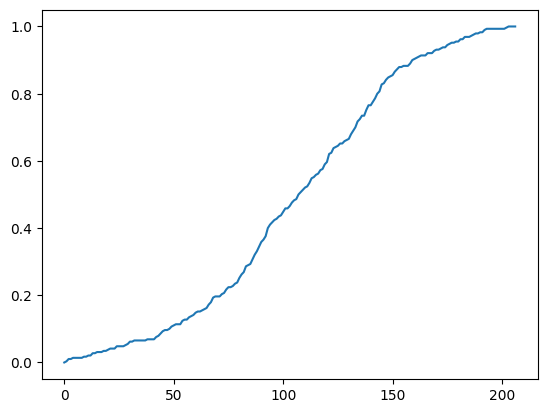

In [271]:
# ROC for totChol-only classifier
ytest_prob = logRegAnalysis.predict_proba(Xtest[['totChol']])
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
ax=sns.lineplot(tpr)

print("AUROC: ", auc(fpr,tpr))

AUROC:  0.7367225684946864


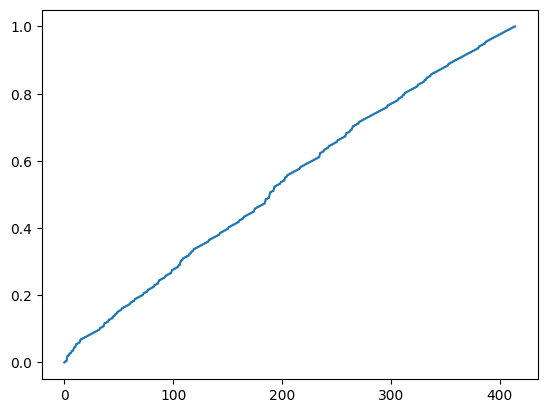

In [272]:
# ROC for all-variable classifier
ytest_prob = complexLR.predict_proba(XtestCMP)
fpr, tpr, _ = roc_curve(ytestCMP, ytest_prob[:,1])
ax=sns.lineplot(tpr)

print("AUROC: ", auc(fpr,tpr))

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

**YOUR ANSWER:** 
If we want to recover at least 20% of future CHD cases, the all-variable classifier is better. At recall = 0.2, precision is significantly higher than the totChol-only classifier.

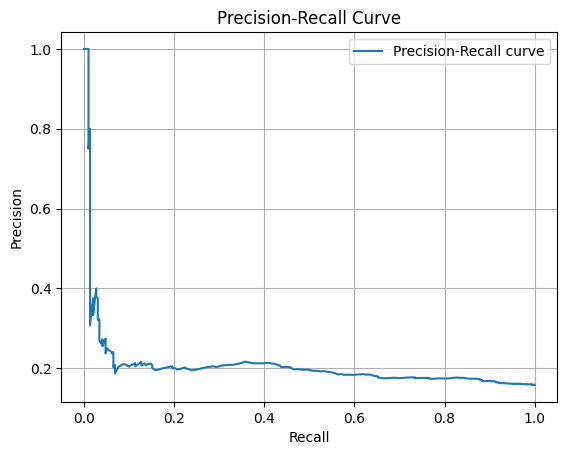

In [273]:
# PRC for totChol-only classifier
ytest_prob = logRegAnalysis.predict_proba(Xtest[['totChol']])[:,1]
#print(ytest_prob)

precision, recall, _ = precision_recall_curve(ytest, ytest_prob)


plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

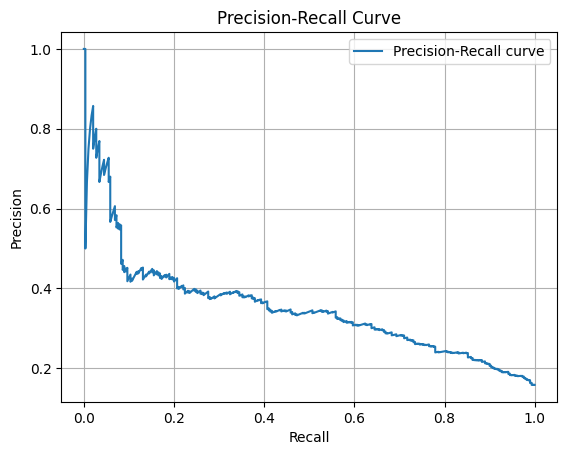

In [274]:
# PRC for all-variable classifier

ytest_prob = complexLR.predict_proba(XtestCMP)[:,1]
#print(ytest_prob)

precision, recall, _ = precision_recall_curve(ytestCMP, ytest_prob)


plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()